<a href="https://colab.research.google.com/github/roshi45/CODSOFT/blob/main/SPAN__MSG_DEDUCTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris, make_gaussian_quantiles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB


plt.style.use('ggplot')

In [ ]:
BASE_URL = "/content/drive/MyDrive/Internship/"
RANDOM_SEED = 0

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(BASE_URL+"spam.csv", encoding='ISO-8859-1')
df.head(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**PREPROCESSING**

In [ ]:
df.nunique()

v1               2
v2            5169
Unnamed: 2      43
Unnamed: 3      10
Unnamed: 4       5
dtype: int64

In [ ]:
for col in df.columns[1:]:
    df[col] = df[col].astype(str).replace('nan', '')
df['Message'] = df.iloc[:, 1:].apply(lambda x: ''.join(x.dropna()), axis=1)
df.drop(df.columns[1:-1], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

v1         0
Message    0
dtype: int64

In [ ]:
spam_map = {"ham": 0, "spam": 1}
df["v1"] = df["v1"].map(lambda x: spam_map[x])

In [ ]:
df.rename(columns={'v1': 'Spam'}, inplace=True)
df.head()

,Spam,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
X = df["Message"]
y = df["Spam"]

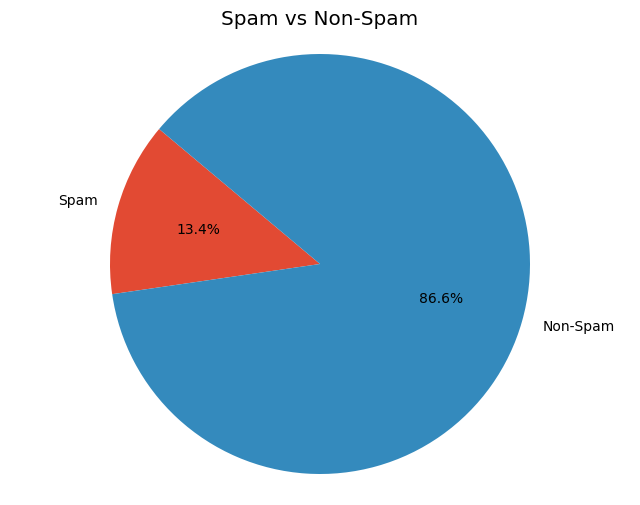

In [ ]:
spam_count = df['Spam'].sum()
non_spam_count = len(df) - spam_count

labels = ['Spam', 'Non-Spam']

sizes = [spam_count, non_spam_count]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Spam vs Non-Spam')
plt.axis('equal')
plt.show()

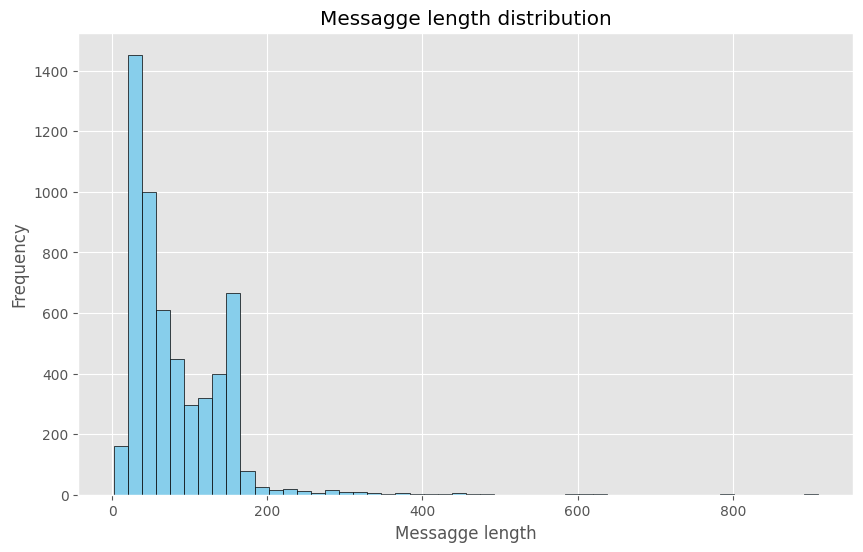

In [ ]:

message_lengths = df['Message'].apply(len)

plt.figure(figsize=(10, 6))
plt.hist(message_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title('Messagge length distribution')
plt.xlabel('Messagge length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

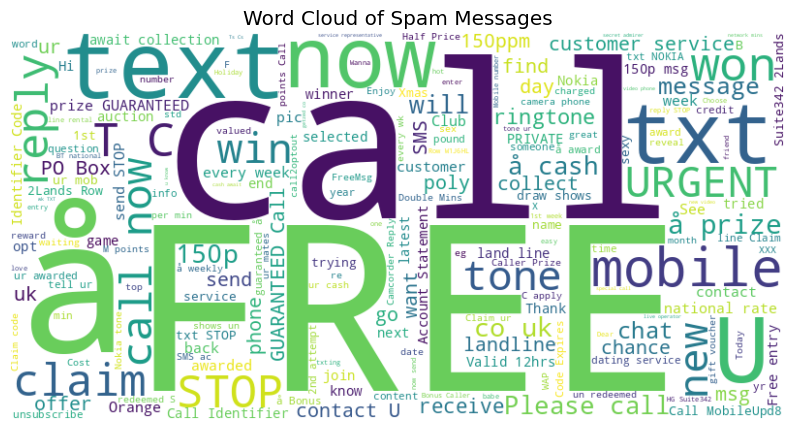

In [ ]:
from wordcloud import WordCloud

spam_messages = ' '.join(df.query('Spam == 1')['Message'])


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_messages)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Spam Messages')
plt.axis('off')
plt.show()

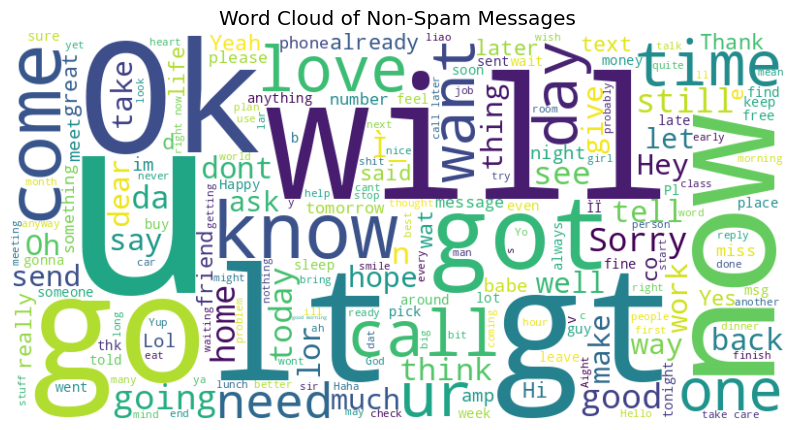

In [ ]:
from wordcloud import WordCloud

spam_messages = ' '.join(df.query('Spam == 0')['Message'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_messages)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Non-Spam Messages')
plt.axis('off')
plt.show()

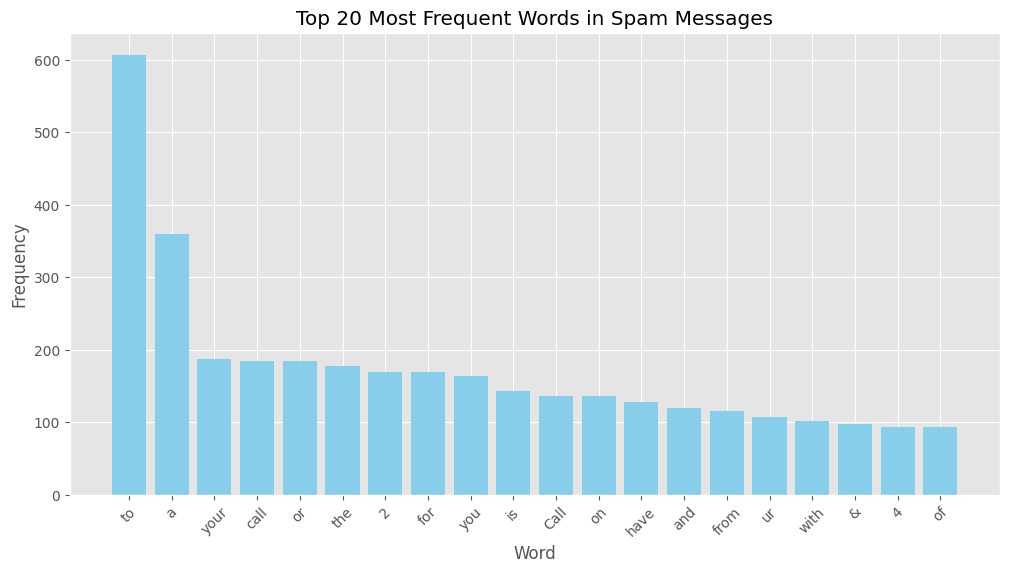

In [ ]:
from collections import Counter
spam_words = ' '.join(df.query('Spam == 1')['Message']).split()

word_counts = Counter(spam_words)
word_counts_df = pd.DataFrame(word_counts.most_common(20), columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 6))
plt.bar(word_counts_df['Word'], word_counts_df['Frequency'], color='skyblue')
plt.title('Top 20 Most Frequent Words in Spam Messages')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

**TfidfVectorizer**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_SEED)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words="english", max_features=50000)
X_train = tfidf.fit_transform(X_train.tolist())
X_test = tfidf.transform(X_test)
X_train.shape

(3900, 6899)

**NAVIE BAYES**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
benb = BernoulliNB()
benb.fit(X_train, y_train)

BernoulliNB()

In [ ]:
y_pred = benb.predict(X_test)


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1434
           1       1.00      0.76      0.86       238

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.96      1672



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1434    0]
 [  57  181]]


In [ ]:
confusion_matrix(y_test, benb.predict(X_test))
aaccuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.9659090909090909


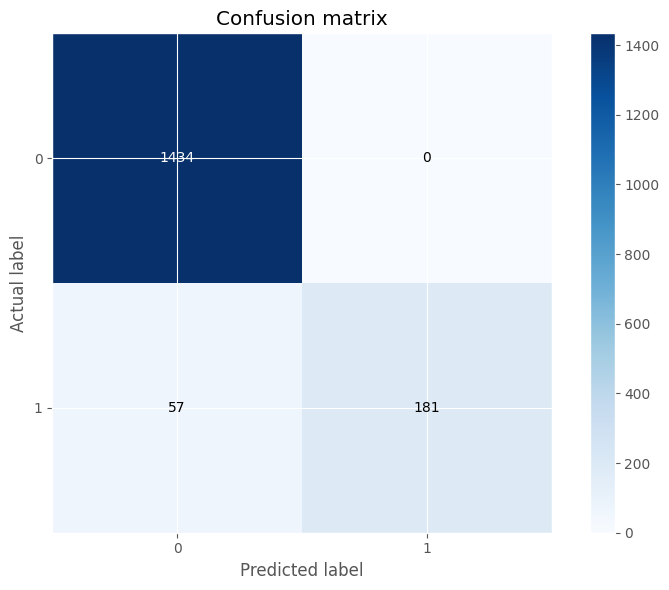

In [ ]:

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()
